In [ ]:
import pandas as pd
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline


In [ ]:
from keras.layers import Dense, Activation, Dropout, Reshape, Permute

In [ ]:
import os
os.environ['PYTHONHASHSEED'] = '0'
import random as rn
import numpy as np
np.random.seed(1)
rn.seed(3)
import tensorflow
tensorflow.random.set_seed(2)
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
#from keras.layers.core import Dense, from keras.layers import Dense, Activation, Dropout, Reshape, Permute
#from keras.layers.recurrent import SimpleRNN


In [ ]:
from keras.layers import SimpleRNN
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from math import sqrt
import datetime as dt
plt.style.use('ggplot')
import DatastreamDSWS as DSWS
import pyodbc

In [ ]:
#pip install pyodbc

In [ ]:
Data_R1=pd.read_csv("refinitiv_out_old.csv")
Data_R1["Date"]=pd.to_datetime(Data_R1["Date"])
Data_R1["Date"]=Data_R1["Date"].dt.date
Data_R1["Date"]=pd.to_datetime(Data_R1["Date"])


Data_R2=pd.read_csv("refinitiv_out1.csv")
Data_R2["Date"]=pd.to_datetime(Data_R2["Date"])
Data_R2["Date"]=Data_R2["Date"].dt.date
Data_R2["Date"]=pd.to_datetime(Data_R2["Date"])

Data_P1=pd.read_csv("platts_1.csv")

Data_P1["Date"]=Data_P1["assessDate"]

Data_P1.drop("assessDate",axis=1,inplace=True)

Data_P1["Date"]=pd.to_datetime(Data_P1["Date"])
Data_P1["Date"]=Data_P1["Date"].dt.date


Data_P1["Date"]=pd.to_datetime(Data_P1["Date"])

Data_P2=pd.read_csv("platts.csv")

Data_P2["Date"]=Data_P2["assessDate"]

Data_P2.drop("assessDate",axis=1,inplace=True)

Data_P2["Date"]=pd.to_datetime(Data_P2["Date"])
Data_P2["Date"]=Data_P2["Date"].dt.date
Data_P2["Date"]=pd.to_datetime(Data_P2["Date"])

Data_P2["Date"].dtype

Data_P3=pd.read_csv("platts_new.csv")

Data_P3["Date"]=Data_P3["assessDate"]

Data_P3.drop("assessDate",axis=1,inplace=True)


Data_P3["Date"]=pd.to_datetime(Data_P3["Date"])
Data_P3["Date"]=Data_P3["Date"].dt.date
Data_P3["Date"]=pd.to_datetime(Data_P3["Date"])

Data_A=pd.read_csv("argus_data.csv")
Data_A["Date"]=pd.to_datetime(Data_A["Date"])
Data_A["Date"]=Data_A["Date"].dt.date
Data_A["Date"]=pd.to_datetime(Data_A["Date"])

Data_A["Date"]

Data_A2=pd.read_csv("Argus_New_Data.csv")
Data_A2.rename(columns={"PUBLICATION_DATE":"Date"},inplace=True)

Data_A2["Date"]=pd.to_datetime(Data_A2["Date"])
Data_A2["Date"]=Data_A2["Date"].dt.date
Data_A2["Date"]=pd.to_datetime(Data_A2["Date"])

Data_1=pd.read_csv("ffa1.csv")
Data_1["Date"]=pd.to_datetime(Data_1["Date"],dayfirst=True)
Data_1.set_index("Date",inplace=True)
Data_2=pd.read_csv("ffa2.csv")
Data_2["Date"]=pd.to_datetime(Data_2["Date"],dayfirst=True)
Data_2.set_index("Date",inplace=True)
Data_3=pd.read_csv("ffa3.csv")
Data_3["Date"]=pd.to_datetime(Data_3["Date"],dayfirst=True)
Data_3.set_index("Date",inplace=True)
Data_x=pd.concat([Data_2,Data_1,Data_3],axis=0)
Data_x=Data_x.iloc[:,1:]
Data_x.reset_index(inplace=True)
Data_x=Data_x.drop_duplicates()


ffa= Data_x.loc[:,~Data_x.columns.duplicated()]


Data_P2= Data_P2.set_index('Date',)
Data_R1= Data_R1.set_index('Date') 
Data_P1= Data_P1.set_index('Date')
Data_P3= Data_P3.set_index('Date')
Data_R2= Data_R2.set_index('Date')
Data_A= Data_A.set_index('Date')
Data_A2= Data_A2.set_index('Date')
ffa= ffa.set_index('Date')

Data=pd.concat([Data_P2,Data_P1,Data_P3,Data_R1,Data_R2,Data_A,Data_A2,ffa],axis=1)

Data.reset_index(inplace=True)



In [ ]:
Data

In [ ]:
Data.shape

In [ ]:
Data_1 = (Data.set_index('Date')
      .reindex(pd.date_range('2015-01-01', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

In [ ]:
Data_1

In [ ]:
Data_1.set_index("Date",inplace=True)

In [ ]:
Data_1=Data_1.fillna(method="ffill")

In [ ]:
Data_2= Data_1.loc[:,~Data_1.columns.duplicated()]

In [ ]:
Data_1=Data_1.fillna(method="ffill")

In [ ]:
Data_2.shape

In [ ]:
Data_2

In [ ]:
Data_2=Data_2.dropna(thresh=len(Data_2)-30, axis=1)

In [ ]:
Data_2=Data_2.fillna(method="ffill")

In [ ]:
Data_2.isnull().sum()

In [ ]:
Tar=pd.read_excel("Copy of BCI - C5TC.xlsx")

Tar["Date"]=pd.to_datetime(Tar["Date"],dayfirst=True)
# Target["Date"]=Target["Date"].dt.date
# Target["Date"]=pd.to_datetime(Target["Date"])

Tar = (Tar.set_index('Date')
      .reindex(pd.date_range('2015-01-01', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

Target=Tar.copy()

Target.set_index("Date",inplace=True)



Target.fillna(method="ffill",inplace=True)

Target

In [ ]:
# Target["shift_15"]=Target["Value"].shift(-15)

In [ ]:
Data_Fin=pd.concat([Target['Value'],Data_2],axis=1)

In [ ]:
Data_Fin

In [ ]:
Data_Fin=Data_Fin.fillna(method="ffill")

In [ ]:
# Data_Fin.to_csv("Data_Fin.csv")

In [ ]:
Data_Fin=Data_Fin.iloc[1:,:]

In [ ]:
Data_Fin=Data_Fin.resample("W-SUN").mean()

In [ ]:
Data_Fin["Shift_4"]=Data_Fin["Value"].shift(-4)

In [ ]:
Data_Fin=Data_Fin.iloc[:-4,:]

In [ ]:
cor={}
for i in range(len(Data_Fin.columns)):   
    cor[Data_Fin.columns[i]]=Data_Fin["Shift_4"].corr(Data_Fin.iloc[:,i])

Imp_f= {k:v for k,v in cor.items() if abs(v)>.50}
len(Imp_f)

In [ ]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [32]:
Data_F = Data_Fin[keys]

In [33]:
Data_F=Data_F.dropna()

In [34]:
Data_F.iloc[1:,:].isnull().sum()

Value         0
AAXJI03       0
AAXJJ03       0
AAXJL03       0
CIBCR00       0
             ..
5TC_C+4Q      0
5TC_C+5Q      0
5TC_C+1CAL    0
5TC_C+2CAL    0
Shift_4       0
Length: 354, dtype: int64

# FB Prophet


In [35]:
Data_F=Data_F.reset_index()

In [36]:
Data_x.head(2)

Date  5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
0 2019-01-02      16267.0     12592.0     13292.0     13725.0     14042.0   
1 2019-01-03      15242.0     12233.0     13050.0     13408.0     13692.0   

   5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  ...  5TC_C+4Q  5TC_C+5Q  \
0         0.0    14050.0   14242.0   16808.0  ...   15300.0   15146.0   
1         0.0    13508.0   13658.0   16483.0  ...   15150.0   15025.0   

   5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  \
0   15683.0     15692.0     13342.0     13408.0     13783.0     14050.0   
1   15567.0     15508.0     13304.0     13396.0     13733.0     14033.0   

   5TC_C+6CAL  5TC_C+7CAL  
0     14054.0     14054.0  
1     14033.0     14033.0  

[2 rows x 21 columns]

In [37]:
Data_cc = (Data_x.set_index('Date')
      .reindex(pd.date_range('2015-01-01', '2024-03-01', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

Data_cc=Data_cc.fillna(method="ffill")

Data_cc.set_index("Date",inplace=True)

Data_cc=Data_cc.resample("W-SUN").mean()

Data_cc=Data_cc.iloc[1:,:]



In [38]:
Data_cc=Data_cc.reset_index()

In [46]:
Data_fc=Data_F.drop("Value",axis=1)

In [47]:
Data_fc[Data_fc["Date"]<="2023-12-17"].iloc[3:-50,:].head(1)

Date  AAXJI03  AAXJJ03  AAXJL03   CIBCR00  CIBCR03   CIGAJ00  CIGAJ03  \
3 2015-02-22  25037.5   388.85   394.77  5.707143    6.008  5.214286    4.944   

   CIHIT03  CIIEI00  ...   5TC_C+2MON   5TC_C+3MON   5TC_C+4MON  5TC_CCURQ  \
3   10.788      5.1  ...  8276.142857  8999.857143  9679.571429     6587.0   

      5TC_C+1Q  5TC_C+4Q      5TC_C+5Q    5TC_C+1CAL    5TC_C+2CAL  \
3  8985.285714    9161.0  11379.571429  12157.428571  13795.857143   

       Shift_4  
3  4021.285714  

[1 rows x 354 columns]

In [48]:
Data_fc

Date       AAXJI03     AAXJJ03     AAXJL03    CIBCR00    CIBCR03  \
0   2015-02-01  23475.357143  364.275714  368.172857   6.478571   6.358571   
1   2015-02-08  25037.500000  388.850000  394.770000   6.292857   6.008000   
2   2015-02-15  25037.500000  388.850000  394.770000   6.050000   6.008000   
3   2015-02-22  25037.500000  388.850000  394.770000   5.707143   6.008000   
4   2015-03-01  25075.535714  389.477143  398.910000   5.771429   5.863000   
..         ...           ...         ...         ...        ...        ...   
455 2023-10-22  54400.000000  596.020000  556.920000  17.407143  15.832000   
456 2023-10-29  54400.000000  596.020000  556.920000  15.492857  15.832000   
457 2023-11-05  54257.142857  576.991429  588.041429  12.721429  15.154143   
458 2023-11-12  54200.000000  569.380000  600.490000  13.064286  14.883000   
459 2023-11-19  54200.000000  569.380000  600.490000  13.835714  14.883000   

       CIGAJ00    CIGAJ03    CIHIT03   CIIEI00  ...    5TC_C+2MON  \
0     4.785714   5.122286  11.142857  5.364286  ...   8633.571429   
1     4.550000   4.944000  10.788000  4.757143  ...   9277.285714   
2     5.021429   4.944000  10.788000  4.921429  ...   8659.857143   
3     5.214286   4.944000  10.788000  5.100000  ...   8276.142857   
4     5.114286   4.943857  10.740429  5.478571  ...   8355.571429   
..         ...        ...        ...       ...  ...           ...   
455  14.314286  13.493000  20.045000  9.950000  ...  16110.428571   
456  11.950000  13.493000  20.045000  9.592857  ...  14564.000000   
457  10.892857  13.030143  21.368571  9.242857  ...  10084.714286   
458  12.292857  12.845000  21.898000  8.992857  ...  10278.285714   
459  12.664286  12.845000  21.898000  9.257143  ...  11639.142857   

       5TC_C+3MON    5TC_C+4MON     5TC_CCURQ     5TC_C+1Q      5TC_C+4Q  \
0     9114.285714   9577.428571   7565.285714  9352.714286   9509.285714   
1     9680.142857  10156.428571   8001.571429  9704.571429   9574.000000   
2     9195.571429   9896.428571   7107.285714  9250.428571   9313.428571   
3     8999.857143   9679.571429   6587.000000  8985.285714   9161.000000   
4     9170.000000   9725.142857   6510.000000  8792.428571   9117.000000   
..            ...           ...           ...          ...           ...   
455  10487.142857   7593.714286  20841.142857  9257.285714  16876.000000   
456   9456.857143   6514.142857  19089.714286  8246.142857  16604.000000   
457   6812.714286   8600.000000  18318.428571  8234.571429  16850.714286   
458   6691.857143   9575.714286  19738.428571  8848.571429  17074.857143   
459   7338.428571  10434.714286  20938.000000  9804.285714  17547.000000   

         5TC_C+5Q    5TC_C+1CAL    5TC_C+2CAL       Shift_4  
0    11883.428571  12541.571429  13962.857143   5349.285714  
1    11812.571429  12614.571429  14019.285714   4919.285714  
2    11497.000000  12274.000000  13827.857143   4241.000000  
3    11379.571429  12157.428571  13795.857143   4021.285714  
4    11288.857143  12163.714286  13852.714286   4288.428571  
..            ...           ...           ...           ...  
455   9624.714286  14253.000000  14658.857143  22164.000000  
456   9339.571429  13702.285714  14282.571429  24336.428571  
457   9466.142857  13810.571429  14388.285714  44283.571429  
458   9603.714286  14120.285714  14594.000000  41072.571429  
459   9878.000000  14723.571429  14900.571429  36756.000000  

[460 rows x 354 columns]

In [58]:
from darts import TimeSeries
future_cov_series = TimeSeries.from_dataframe(Data_fc.iloc[:-50,:], 'Date')
future_cov_seriesss = TimeSeries.from_dataframe(Data_fc.iloc[-50:,:], 'Date')


In [59]:
Data_fc[Data_fc["Date"]<="2023-12-17"].iloc[3:-50,:].shape

(407, 354)

In [60]:
display(Data_fc[Data_fc["Date"]>"2023-01-01"].shape)
display(Data_fc[Data_fc["Date"]>"2023-12-17"].shape)

(46, 354)

(0, 354)

In [62]:
Data_fc[Data_fc["Date"]<="2023-01-01"].head()

Date       AAXJI03     AAXJJ03     AAXJL03   CIBCR00   CIBCR03  \
0 2015-02-01  23475.357143  364.275714  368.172857  6.478571  6.358571   
1 2015-02-08  25037.500000  388.850000  394.770000  6.292857  6.008000   
2 2015-02-15  25037.500000  388.850000  394.770000  6.050000  6.008000   
3 2015-02-22  25037.500000  388.850000  394.770000  5.707143  6.008000   
4 2015-03-01  25075.535714  389.477143  398.910000  5.771429  5.863000   

    CIGAJ00   CIGAJ03    CIHIT03   CIIEI00  ...   5TC_C+2MON   5TC_C+3MON  \
0  4.785714  5.122286  11.142857  5.364286  ...  8633.571429  9114.285714   
1  4.550000  4.944000  10.788000  4.757143  ...  9277.285714  9680.142857   
2  5.021429  4.944000  10.788000  4.921429  ...  8659.857143  9195.571429   
3  5.214286  4.944000  10.788000  5.100000  ...  8276.142857  8999.857143   
4  5.114286  4.943857  10.740429  5.478571  ...  8355.571429  9170.000000   

     5TC_C+4MON    5TC_CCURQ     5TC_C+1Q     5TC_C+4Q      5TC_C+5Q  \
0   9577.428571  7565.285714  9352.714286  9509.285714  11883.428571   
1  10156.428571  8001.571429  9704.571429  9574.000000  11812.571429   
2   9896.428571  7107.285714  9250.428571  9313.428571  11497.000000   
3   9679.571429  6587.000000  8985.285714  9161.000000  11379.571429   
4   9725.142857  6510.000000  8792.428571  9117.000000  11288.857143   

     5TC_C+1CAL    5TC_C+2CAL      Shift_4  
0  12541.571429  13962.857143  5349.285714  
1  12614.571429  14019.285714  4919.285714  
2  12274.000000  13827.857143  4241.000000  
3  12157.428571  13795.857143  4021.285714  
4  12163.714286  13852.714286  4288.428571  

[5 rows x 354 columns]

In [64]:
future_cov_series

<TimeSeries (DataArray) (Date: 410, component: 353, sample: 1)>
array([[[23475.35714286],
        [  364.27571429],
        [  368.17285714],
        ...,
        [12541.57142857],
        [13962.85714286],
        [ 5349.28571429]],

       [[25037.5       ],
        [  388.85      ],
        [  394.77      ],
        ...,
        [12614.57142857],
        [14019.28571429],
        [ 4919.28571429]],

       [[25037.5       ],
        [  388.85      ],
        [  394.77      ],
        ...,
...
        ...,
        [12289.71428571],
        [12974.85714286],
        [16186.14285714]],

       [[43060.        ],
        [  571.97      ],
        [  704.97      ],
        ...,
        [12069.85714286],
        [12819.42857143],
        [19851.71428571]],

       [[43154.28571429],
        [  536.69      ],
        [  666.44428571],
        ...,
        [11631.85714286],
        [12534.        ],
        [18749.        ]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2015-02-01 2015-02-08 ... 2022-12-04
  * component  (component) object 'AAXJI03' 'AAXJJ03' ... '5TC_C+2CAL' 'Shift_4'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [65]:
Data_F.head()

Date        Value       AAXJI03     AAXJJ03     AAXJL03   CIBCR00  \
0 2015-02-01  7134.857143  23475.357143  364.275714  368.172857  6.478571   
1 2015-02-08  6672.000000  25037.500000  388.850000  394.770000  6.292857   
2 2015-02-15  6429.571429  25037.500000  388.850000  394.770000  6.050000   
3 2015-02-22  5491.142857  25037.500000  388.850000  394.770000  5.707143   
4 2015-03-01  5349.285714  25075.535714  389.477143  398.910000  5.771429   

    CIBCR03   CIGAJ00   CIGAJ03    CIHIT03  ...   5TC_C+2MON   5TC_C+3MON  \
0  6.358571  4.785714  5.122286  11.142857  ...  8633.571429  9114.285714   
1  6.008000  4.550000  4.944000  10.788000  ...  9277.285714  9680.142857   
2  6.008000  5.021429  4.944000  10.788000  ...  8659.857143  9195.571429   
3  6.008000  5.214286  4.944000  10.788000  ...  8276.142857  8999.857143   
4  5.863000  5.114286  4.943857  10.740429  ...  8355.571429  9170.000000   

     5TC_C+4MON    5TC_CCURQ     5TC_C+1Q     5TC_C+4Q      5TC_C+5Q  \
0   9577.428571  7565.285714  9352.714286  9509.285714  11883.428571   
1  10156.428571  8001.571429  9704.571429  9574.000000  11812.571429   
2   9896.428571  7107.285714  9250.428571  9313.428571  11497.000000   
3   9679.571429  6587.000000  8985.285714  9161.000000  11379.571429   
4   9725.142857  6510.000000  8792.428571  9117.000000  11288.857143   

     5TC_C+1CAL    5TC_C+2CAL      Shift_4  
0  12541.571429  13962.857143  5349.285714  
1  12614.571429  14019.285714  4919.285714  
2  12274.000000  13827.857143  4241.000000  
3  12157.428571  13795.857143  4021.285714  
4  12163.714286  13852.714286  4288.428571  

[5 rows x 355 columns]

In [66]:
Data_F.loc[:,['Date', 'Shift_4']].iloc[:-50,:2]

Date       Shift_4
0   2015-02-01   5349.285714
1   2015-02-08   4919.285714
2   2015-02-15   4241.000000
3   2015-02-22   4021.285714
4   2015-03-01   4288.428571
..         ...           ...
405 2022-11-06  13065.714286
406 2022-11-13  13507.285714
407 2022-11-20  16186.142857
408 2022-11-27  19851.714286
409 2022-12-04  18749.000000

[410 rows x 2 columns]

In [67]:
Data_F.loc[:,['Date', 'Shift_4']].iloc[:-50,:2]

Date       Shift_4
0   2015-02-01   5349.285714
1   2015-02-08   4919.285714
2   2015-02-15   4241.000000
3   2015-02-22   4021.285714
4   2015-03-01   4288.428571
..         ...           ...
405 2022-11-06  13065.714286
406 2022-11-13  13507.285714
407 2022-11-20  16186.142857
408 2022-11-27  19851.714286
409 2022-12-04  18749.000000

[410 rows x 2 columns]

In [68]:
from darts.models import Prophet
from darts.utils.timeseries_generation import datetime_attribute_timeseries

series = TimeSeries.from_dataframe(Data_F.loc[:,['Date', 'Shift_4']].iloc[:-50,:2], 'Date', 'Shift_4')
# optionally, use some future covariates; e.g. the value of the month encoded as a sine and cosine series
#futur_cov = Data_x.iloc[:-50,:]
# adding a seasonality (daily, weekly and yearly are included by default) and holidays
model = Prophet(
    add_seasonalities={
        'name':"weekly_seasonality",
        'seasonal_periods':4,
        'fourier_order':5
        }
)
model.fit(series,future_cov_series )
#future_cov = Data_x.iloc[-50:,:]
pred = model.predict(50,future_cov_seriesss)
plt.plot(pred.values())

19:40:45 - cmdstanpy - INFO - Chain [1] start processing
19:40:48 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
future_cov_series

<TimeSeries (DataArray) (Date: 410, component: 353, sample: 1)>
array([[[23475.35714286],
        [  364.27571429],
        [  368.17285714],
        ...,
        [12541.57142857],
        [13962.85714286],
        [ 5349.28571429]],

       [[25037.5       ],
        [  388.85      ],
        [  394.77      ],
        ...,
        [12614.57142857],
        [14019.28571429],
        [ 4919.28571429]],

       [[25037.5       ],
        [  388.85      ],
        [  394.77      ],
        ...,
...
        ...,
        [12289.71428571],
        [12974.85714286],
        [16186.14285714]],

       [[43060.        ],
        [  571.97      ],
        [  704.97      ],
        ...,
        [12069.85714286],
        [12819.42857143],
        [19851.71428571]],

       [[43154.28571429],
        [  536.69      ],
        [  666.44428571],
        ...,
        [11631.85714286],
        [12534.        ],
        [18749.        ]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2015-02-01 2015-02-08 ... 2022-12-04
  * component  (component) object 'AAXJI03' 'AAXJJ03' ... '5TC_C+2CAL' 'Shift_4'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [70]:
Data_F.iloc[:-50,0:2]

Date         Value
0   2015-02-01   7134.857143
1   2015-02-08   6672.000000
2   2015-02-15   6429.571429
3   2015-02-22   5491.142857
4   2015-03-01   5349.285714
..         ...           ...
405 2022-11-06  11240.142857
406 2022-11-13  12818.285714
407 2022-11-20  10312.857143
408 2022-11-27  11446.285714
409 2022-12-04  13065.714286

[410 rows x 2 columns]

In [71]:
Data_x.reset_index(inplace=True)

In [72]:
Data_cc = (Data_x.set_index('Date')
      .reindex(pd.date_range('2015-01-01', '2024-03-01', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

In [ ]:
Data_cc=Data_cc.fillna(method="ffill")

In [ ]:
Data_cc.set_index("Date",inplace=True)

In [ ]:
Data_cc=Data_cc.resample("W-SUN").mean()

In [ ]:
Data_cc=Data_cc.iloc[1:,:]

In [ ]:
Data_cc[Data_cc.index<="2023-12-17"].iloc[3:-50,:]

In [ ]:
np.conData_F.iloc[:-50,:]

In [73]:
x=pd.DataFrame()
x[["Date","Actual"]]=Data_F.iloc[-50:,:2]
x["Pred"]=pred.values().reshape(-1)

In [ ]:
Data_F.iloc[-50:,:2]

In [ ]:
Data_F.iloc[-50:, 1]

In [ ]:
x

In [ ]:
x.set_index("Date",inplace=True)

In [ ]:
x

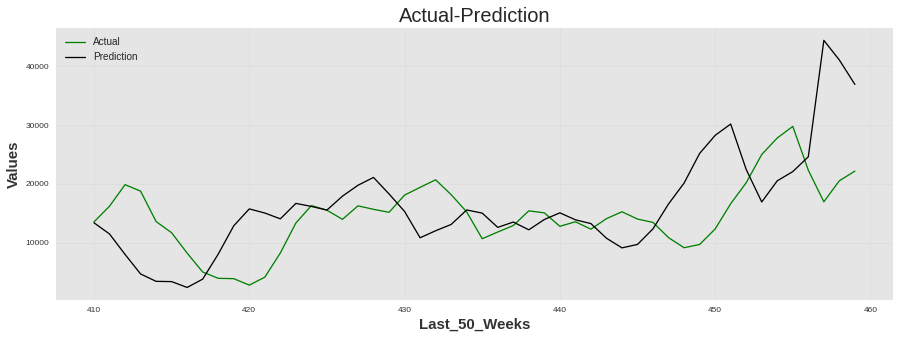

MAPE: 0.5653730654566212


In [74]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction",fontdict=font1)
plt.plot(x['Actual'],color="green",label="Actual")
plt.plot(x["Pred"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("Values",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(x['Actual'].shape[0]-11):
    Mape.append((np.abs((x['Actual'].iloc[i] - x['Pred'].iloc[i]) / x['Actual'].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
len(future_cov_series)

In [ ]:
len(series)

In [ ]:
Data_Fi.columns

In [ ]:
Data_x.set_index("Date",inplace=True)

In [ ]:
plt.plot(Data_F.iloc[-50:,1])

In [ ]:
from darts.datasets import AirPassengersDataset
from darts.models import Prophet
from darts.utils.timeseries_generation import datetime_attribute_timeseries
series = AirPassengersDataset().load()
# optionally, use some future covariates; e.g. the value of the month encoded as a sine and cosine series
# future_cov = datetime_attribute_timeseries(series, "month", cyclic=True, add_length=6)
# adding a seasonality (daily, weekly and yearly are included by default) and holidays
model = Prophet(
    add_seasonalities={
        'name':"quarterly_seasonality",
        'seasonal_periods':4,
        'fourier_order':5
        },
)
model.fit(series,future_cov_df)
pred = model.predict(50,)
pred.values()


In [ ]:
series

In [ ]:
pip install darts


In [ ]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction",fontdict=font1)
plt.plot(actualVSpredicted['Actual'],color="green",label="Actual")
plt.plot(actualVSpredicted['Predicted'],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_2",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(actualVSpredicted['Actual'].shape[0]):
    Mape.append((np.abs((actualVSpredicted['Actual'].iloc[i] - actualVSpredicted['Predicted'].iloc[i]) / actualVSpredicted['Actual'].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
pred_updated=[]
actual=actualVSpredicted[actualVSpredicted['Actual']!=0].Actual.values
pred=actualVSpredicted[actualVSpredicted['Actual']!=0].Predicted.values
        
difference= np.mean(actual-pred)
        
print(difference)
        
actualVSpredicted['Predicted']= actualVSpredicted['Predicted']+ difference
        
last_pred= actualVSpredicted[actualVSpredicted['Actual']!=0].Predicted.values[-1]
first_forecast= actualVSpredicted[actualVSpredicted['Actual']==0].Predicted.values[0]
        
        
first_forecast_updated= np.clip(first_forecast, last_pred*0.97, last_pred*1.03)
difference= first_forecast_updated- first_forecast
other_forecast_updated = actualVSpredicted[actualVSpredicted['Actual']==0].Predicted.values[1:] +difference
pred_updated.extend([first_forecast_updated])
pred_updated.extend(other_forecast_updated)
        
        
actualVSpredicted.Predicted[actualVSpredicted['Actual']==0]= pred_updated

In [ ]:
n_past = 10
n_days_for_prediction=90
        
train_data = series[:int(len(series)*0.9)]
val_data = series[int(len(series)*0.9):int(len(series)*1)]
        
train_dates = pd.to_datetime(train_data.index)
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
        
        
        
train_data = series[:int(len(series)*1)]
train_dates = pd.to_datetime(train_data.index)
predict_period_dates = pd.date_range(max(train_dates)+dt.timedelta(days=1), periods=n_days_for_prediction).tolist()
        
# Normalisation
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
        
        
timesteps = 30
hl = [50,45]
lr = 1e-3
batch_size = 32
num_epochs = 100
        
X_train = []
Y_train = []

In [ ]:
for i in range(timesteps,val.shape[0]):
    X_train.append(val[i-timesteps:i])
    Y_train.append(val[i][0])
X_train,Y_train = np.array(X_train),np.array(Y_train)

In [ ]:
n_days_for_prediction=90
prediction = model.predict(X_train[-n_days_for_prediction:])
cols = list(series)[0:126]
df_for_forecast = series[cols].astype(float)
prediction_copies = np.repeat(prediction, df_for_forecast.shape[1], axis=-1)
y_pred_future = sc.inverse_transform(prediction_copies)[:,0]        

In [ ]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
df_forecast = pd.DataFrame({'Dates':np.array(forecast_dates), 'Value':y_pred_future})
df_forecast['Dates']=pd.to_datetime(df_forecast['Dates'])

In [ ]:
original = pd.DataFrame()
original['actual'] = Data_F['Value']
original = original.reset_index()

In [ ]:
#original

In [ ]:
original.rename(columns={'Date':'Dates'}, inplace = True)
original['Dates'] = original['Dates'].apply(pd.to_datetime)
df_forecast_orignal = df_forecast.merge(original, on='Dates', how='left')
df_forecast_orignal['Dates'] = df_forecast_orignal['Dates'].drop_duplicates()
df_forecast_orignal = df_forecast_orignal.drop(['Dates'], axis=1)
df_forecast_orignal = df_forecast_orignal.rename(columns={'Value':'predicted'})        

In [ ]:
tfd = actualVSpredicted.append(pd.DataFrame({
        "Dates": df_forecast['Dates'][0:].values,
        "Actual": [0 for i in range(df_forecast.shape[0])],
        "Predicted": df_forecast['Value'][0:]
        }))
tfd['Dates'] = pd.to_datetime( tfd['Dates'], format='%Y-%m-%d')

In [ ]:
tfd['week_day']=tfd['Dates'].dt.weekday
       
tfd=tfd[~tfd['week_day'].isin([5,6])]

In [ ]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction",fontdict=font1)
plt.plot(tfd['Actual'],color="green",label="Actual")
plt.plot(tfd['Predicted'],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_2",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(tfd['Actual'].shape[0]):
    Mape.append((np.abs((tfd['Actual'].iloc[i] - tfd['Predicted'].iloc[i]) / tfd['Actual'].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
pred_updated=[]
actual=tfd[tfd['Actual']!=0].Actual.values
pred=tfd[tfd['Actual']!=0].Predicted.values
        
difference= np.mean(actual-pred)
        
print(difference)
        
tfd['Predicted']= tfd['Predicted']+ difference
        
last_pred= tfd[tfd['Actual']!=0].Predicted.values[-1]
first_forecast= tfd[tfd['Actual']==0].Predicted.values[0]
        
        
first_forecast_updated= np.clip(first_forecast, last_pred*0.97, last_pred*1.03)
difference= first_forecast_updated- first_forecast
other_forecast_updated = tfd[tfd['Actual']==0].Predicted.values[1:] +difference
pred_updated.extend([first_forecast_updated])
pred_updated.extend(other_forecast_updated)
        
        
tfd.Predicted[tfd['Actual']==0]= pred_updated

In [ ]:
n_past = 10
        n_days_for_prediction=90
        
        train_data = series[:int(len(series)*0.9)]
        val_data = series[int(len(series)*0.9):int(len(series)*1)]
        
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
        
        
        
        train_data = series[:int(len(series)*1)]
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(max(train_dates)+dt.timedelta(days=1), periods=n_days_for_prediction).tolist()
        
        # Normalisation
        sc = MinMaxScaler()
        train = sc.fit_transform(train_data)
        val = sc.transform(val_data)
        
        
        timesteps = 30
        hl = [50,45]
        lr = 1e-3
        batch_size = 32
        num_epochs = 100
        
        X_train = []
        Y_train = []
        
        
        # Loop for val data
        for i in range(timesteps,val.shape[0]):
            X_train.append(val[i-timesteps:i])
            Y_train.append(val[i][0])
        X_train,Y_train = np.array(X_train),np.array(Y_train)
        
        
        n_days_for_prediction=90
        prediction = model.predict(X_train[-n_days_for_prediction:])
        cols = list(series)[0:35]
        df_for_forecast = df[cols].astype(float)
        prediction_copies = np.repeat(prediction, df_for_forecast.shape[1], axis=-1)
        y_pred_future = sc.inverse_transform(prediction_copies)[:,0]
        
        
        forecast_dates = []
        for time_i in predict_period_dates:
            forecast_dates.append(time_i.date())
        df_forecast = pd.DataFrame({'Dates':np.array(forecast_dates), 'AL_cash_settlement':y_pred_future})
        df_forecast['Dates']=pd.to_datetime(df_forecast['Dates'])
        
        
        original = pd.DataFrame()
        original['actual'] = df['AL_cash_settlement']
        original = original.reset_index()
        original.rename(columns={'index':'Dates'}, inplace = True)
        original['Dates'] = original['Dates'].apply(pd.to_datetime)
        df_forecast_orignal = df_forecast.merge(original, on='Dates', how='left')
        df_forecast_orignal['Dates'] = df_forecast_orignal['Dates'].drop_duplicates()
        df_forecast_orignal = df_forecast_orignal.drop(['Dates'], axis=1)
        df_forecast_orignal = df_forecast_orignal.rename(columns={'AL_cash_settlement':'predicted'})
        
        
        
        tfd = actualVSpredicted.append(pd.DataFrame({
        "Dates": df_forecast['Dates'][0:].values,
        "Actual": [0 for i in range(df_forecast.shape[0])],
        "Predicted": df_forecast['AL_cash_settlement'][0:]
        }))
        tfd['Dates'] = pd.to_datetime( tfd['Dates'], format='%Y-%m-%d')
        
        
        
        tfd['week_day']=tfd['Dates'].dt.weekday
        
        
        tfd=tfd[~tfd['week_day'].isin([5,6])]
        
        
        tfd.to_csv(r'AL_raw_preds.csv')

In [ ]:
resultant_dfalt

In [ ]:

        

        
        
        #plot_error(train_error,val_error)
        
        
        # print('MSE = {}'.format(mse))
        # print('RMSE = {}'.format(rmse))
        # print('R-Squared Score = {}'.format(r2_value))
        # print('MAPE Score = {}'.format(mape))
        # print('BDP = {}'.format(bdp))
        # print('LDP = {}'.format(ldp))
        
        #plot_data(true,predicted)
        
        true = true.reshape(-1, 1)
        predicted = predicted.reshape(-1, 1)
        cols = list(series)[0:35]
        df_for_training = df[cols].astype(float)
        true_copies = np.repeat(true, df_for_training.shape[1], axis=-1)
        predicted_copies = np.repeat(predicted, df_for_training.shape[1], axis=-1)
        
        
        
        actualvalue = sc.inverse_transform(true_copies)[:,0]
        predictedvalue = sc.inverse_transform(predicted_copies)[:,0]
        
        
        actualvalue = actualvalue.tolist()
        predictedvalue = predictedvalue.tolist()
        actualVSpredicted = pd.DataFrame(
            {'Actual': actualvalue,
             'Predicted': predictedvalue
            })#.to_excel('actualVSpredicted-2022-02-21.xlsx', index=False)
        resultant_dfalt = resultant_df.reset_index(level=0)
        li = resultant_dfalt['index'].tail(len(test_data)-timesteps).tolist()
        actualVSpredicted['Dates'] = pd.DataFrame({'col':li})
        
        
        
        n_past = 10
        n_days_for_prediction=90
        
        train_data = series[:int(len(series)*0.9)]
        val_data = series[int(len(series)*0.9):int(len(series)*1)]
        
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
        
        
        
        train_data = series[:int(len(series)*1)]
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(max(train_dates)+dt.timedelta(days=1), periods=n_days_for_prediction).tolist()
        
        # Normalisation
        sc = MinMaxScaler()
        train = sc.fit_transform(train_data)
        val = sc.transform(val_data)
        
        
        timesteps = 30
        hl = [50,45]
        lr = 1e-3
        batch_size = 32
        num_epochs = 100
        
        X_train = []
        Y_train = []
        
        
        # Loop for val data
        for i in range(timesteps,val.shape[0]):
            X_train.append(val[i-timesteps:i])
            Y_train.append(val[i][0])
        X_train,Y_train = np.array(X_train),np.array(Y_train)
        
        
        n_days_for_prediction=90
        prediction = model.predict(X_train[-n_days_for_prediction:])
        cols = list(series)[0:35]
        df_for_forecast = df[cols].astype(float)
        prediction_copies = np.repeat(prediction, df_for_forecast.shape[1], axis=-1)
        y_pred_future = sc.inverse_transform(prediction_copies)[:,0]
        
        
        forecast_dates = []
        for time_i in predict_period_dates:
            forecast_dates.append(time_i.date())
        df_forecast = pd.DataFrame({'Dates':np.array(forecast_dates), 'AL_cash_settlement':y_pred_future})
        df_forecast['Dates']=pd.to_datetime(df_forecast['Dates'])
        
        
        original = pd.DataFrame()
        original['actual'] = df['AL_cash_settlement']
        original = original.reset_index()
        original.rename(columns={'index':'Dates'}, inplace = True)
        original['Dates'] = original['Dates'].apply(pd.to_datetime)
        df_forecast_orignal = df_forecast.merge(original, on='Dates', how='left')
        df_forecast_orignal['Dates'] = df_forecast_orignal['Dates'].drop_duplicates()
        df_forecast_orignal = df_forecast_orignal.drop(['Dates'], axis=1)
        df_forecast_orignal = df_forecast_orignal.rename(columns={'AL_cash_settlement':'predicted'})
        
        
        
        tfd = actualVSpredicted.append(pd.DataFrame({
        "Dates": df_forecast['Dates'][0:].values,
        "Actual": [0 for i in range(df_forecast.shape[0])],
        "Predicted": df_forecast['AL_cash_settlement'][0:]
        }))
        tfd['Dates'] = pd.to_datetime( tfd['Dates'], format='%Y-%m-%d')
        
        
        
        tfd['week_day']=tfd['Dates'].dt.weekday
        
        
        tfd=tfd[~tfd['week_day'].isin([5,6])]
        
        
        tfd.to_csv(r'AL_raw_preds.csv')
        

In [ ]:
Data_W=Data_2.resample("W-Sun").mean()

In [ ]:
Data_W.drop("BRXMCOA.",axis=1,inplace=True)

In [ ]:
Data_W.tail()

In [ ]:
#Data_new=pd.concat([Data_W,df_M],axis=1)
Data_new = Data_W

In [ ]:
Data_new.isnull().sum()

In [ ]:
Data_new

In [ ]:
Tar=pd.read_csv("Target_feature.csv")

Tar["Date"]=pd.to_datetime(Tar["Date"],dayfirst=True)
# Target["Date"]=Target["Date"].dt.date
# Target["Date"]=pd.to_datetime(Target["Date"])

Tar = (Tar.set_index('Date')
      .reindex(pd.date_range('2014-02-24', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

Target=Tar.copy()

Target.set_index("Date",inplace=True)



Target.fillna(method="ffill",inplace=True)

Target

Tag_f=Target.resample("W-SUN").mean()

Tag_f.isnull().sum()

In [ ]:
Tag_f.drop(['shift_30'], axis=1,inplace=True)

In [ ]:
 earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5,  verbose=1, mode='min')
        callbacks_list = [earlystop]
        
        #Build and train the model
       
        
        def forecast(model,train,n_days_for_forecast):
            X_train = []
            Y_train = []
        
            # Loop for training data
            for i in range(timesteps,train.shape[0]):
                X_train.append(train[i-timesteps:i])
                Y_train.append(train[i][0])
            X_train,Y_train = np.array(X_train),np.array(Y_train)
        
            n_days_for_prediction=n_days_for_forecast
            prediction = model.predict(X_train[-n_days_for_prediction:])
            prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
            y_pred_future = sc.inverse_transform(prediction_copies)[:,0]
        
            forecast_dates = []
            for time_i in predict_period_dates:
                forecast_dates.append(time_i.date())
        
            df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'AL_cash_settlement':y_pred_future})
            df_forecast['Date']=pd.to_datetime(df_forecast['Date'])
        #     df_forecast.to_excel('multivariate-3-RNN-forecast.xlsx')
            return df_forecast
        
        # Evaluating the model

        
        # Plotting the predictions
        def plot_data(Y_test,Y_hat):
            plt.figure(figsize = (20,7))
            plt.plot(Y_test,c = 'r')
            plt.plot(Y_hat,c = 'y')
            plt.xlabel('Day')
            plt.ylabel('Price')
            plt.title("Price Prediction using Multivatiate-RNN")
            plt.legend(['Actual','Predicted'],loc = 'lower right')
            plt.show()
        
        # Plotting the training errors
        def plot_error(train_loss,val_loss):
            plt.figure(figsize = (20,7))
            plt.plot(train_loss,c = 'r')
            plt.plot(val_loss,c = 'b')
            plt.ylabel('Loss')
            plt.xlabel('Epochs')
            plt.title('Loss Plot')
            plt.legend(['train','val'],loc = 'upper right')
            plt.show()
        
        
        
        series = df[["AL_cash_settlement","LAHCASH","LAH3MTH","LADCASH","LAD3MTH","LNA3MTH","LNACASH","LAH3MTC","LAH15MT","LAH27MT","LAD15MT","LAD3MTC","MAHCS04","BA:ALU","L:PMET","IN:NTA","G:ALU","AL_3months","EIA0007","CN:yal","CN:OSH","CN:WNG","BALTICF","CRUDOIL","OILWTIN","CRUDWTC","GSLUPRM","GSLUREG","SHGSIGL","LLCCS20","Natural_Gas","SHCNOPI","SHCNCPI"]]
        print(series.shape)
        print(series.tail())
        
        
        
        
        # Pulling the last ID count for inserting the latest index into db
        # server = '10.136.218.70'
        # database = 'PROCPRICEPRED'
        # username = 'PRICEPRED'
        # password = '590_Prafulla;'
        cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
        outputID = pd.read_sql_query("select * from [PRICEPRED].[T_PP_MODEL_OUTPUT] where PMO_PARAM_ID='ALPRICEOUTPUT'",cnxn)
        cnxn.close()
        idcount = int(outputID.iloc[0].values[0])
        #idcount=10000
        
        tfd=tfd.reset_index(drop=True)
        
        
        
        
        def adjust_predictions(tfd):
                
            pred_updated=[]
            actual=tfd[tfd['Actual']!=0].Actual.values
            pred=tfd[tfd['Actual']!=0].Predicted.values
        
            difference= np.mean(actual-pred)
        
            print(difference)
        
            tfd['Predicted']= tfd['Predicted']+ difference
        
            last_pred= tfd[tfd['Actual']!=0].Predicted.values[-1]
            first_forecast= tfd[tfd['Actual']==0].Predicted.values[0]
        
        
            first_forecast_updated= np.clip(first_forecast, last_pred*0.97, last_pred*1.03)
            difference= first_forecast_updated- first_forecast
            other_forecast_updated = tfd[tfd['Actual']==0].Predicted.values[1:] +difference
            pred_updated.extend([first_forecast_updated])
            pred_updated.extend(other_forecast_updated)
        
        
            tfd.Predicted[tfd['Actual']==0]= pred_updated
        
        
            return tfd
        
        
        tfd= adjust_predictions(tfd)
        
        
        
        
        tfd=tfd[tfd['Dates']>= (dt.datetime.today()-dt.timedelta(days=180)).strftime("%Y-%m-%d") ] #### change it 
        
        
        tfd=tfd.reset_index(drop=True)
        
        
        def calculate_metrics(df):
           actual=df['Actual'].values
           pred=df['Predicted'].values
        
           #difference= np.mean(actual-pred)
        
           #print(difference)
           #pred= pred+difference
        
           mse = mean_squared_error(actual,pred)
           rmse = sqrt(mse)
           r = r2_score(actual,pred)
        
           bdp =1- np.round(np.min(np.abs(pred-actual)/ actual),2)
           ldp =1- np.round(np.max(np.abs(pred-actual)/ actual),2)
        
        
           mape = mean_absolute_percentage_error(actual,pred)
           return mse, rmse, r,  mape, bdp*100, ldp*100 #np.clip(ldp,0.7,1)*100
        
        
        
        mse, rmse, r2_value,  mape, bdp, ldp=calculate_metrics(tfd[tfd['Actual']!=0])
        
        finalDf = pd.DataFrame()
        
        finalDf['PMO_PRED_VALUE'] = tfd['Predicted']#.astype('int64')
        finalDf['PMO_OUTPUT_ID'] = np.arange(idcount+1,idcount+len(finalDf)+1).astype('int64')
        finalDf['PMO_ACT_VALUE'] = tfd['Actual']#.astype('int64')
        finalDf['PMO_PROG_RUNID'] = 1
        finalDf['PMO_STATUS'] = str('Y')
        finalDf['PMO_CRT_BY'] = str('A&I')
        finalDf['PMO_CRT_ON'] = (dt.datetime.today()).strftime('%Y-%m-%d')
        finalDf['Commodity'] = str('Aluminium')
        finalDf['MAPE'] = mape
        finalDf['r2score'] = np.clip(r2_value, 0.5, 1.0)
        finalDf['MSE'] = mse
        finalDf['RMSE'] = rmse
        finalDf['BDP'] = bdp
        finalDf['LDP'] =ldp
        finalDf['PMO_PRED_YEAR'] = tfd['Dates'].dt.isocalendar().year
        finalDf['PMO_PARAM_ID'] = str('ALPRICEOUTPUT')
        finalDf['PMO_PRED_MONTH'] = tfd['Dates'].dt.month
        finalDf['PMO_PRED_WEEKNO'] = tfd['Dates'].dt.isocalendar().week
        finalDf['PMO_PRED_STARTDT'] = pd. DatetimeIndex(tfd['Dates'])
        finalDf['PMO_PRED_ENDDT'] = pd. DatetimeIndex(tfd['Dates'])
        
        
        finalDf['PMO_PRED_STARTDT'] = pd.to_datetime(finalDf['PMO_PRED_STARTDT']).dt.strftime('%Y-%m-%d')
        finalDf['PMO_PRED_ENDDT'] = pd.to_datetime(finalDf['PMO_PRED_ENDDT']).dt.strftime('%Y-%m-%d')
        finalDf['PMO_CRT_ON'] = pd.to_datetime(finalDf['PMO_CRT_ON']).dt.strftime('%Y-%m-%d')
        #finalDf['PMO_UPD_ON'] = pd.to_datetime(finalDf['PMO_UPD_ON']).dt.strftime('%Y-%m-%d')
        
        finalDf['PMO_PRED_VALUE'] = finalDf['PMO_PRED_VALUE'].round(decimals = 2)
        finalDf['PMO_ACT_VALUE'] = finalDf['PMO_ACT_VALUE'].round(decimals = 2)
        finalDf['MAPE'] = finalDf['MAPE'].round(decimals = 2)
        finalDf['r2score'] = finalDf['r2score'].round(decimals = 2)
        finalDf['MSE'] = finalDf['MSE'].round(decimals = 2)
        finalDf['RMSE'] = finalDf['RMSE'].round(decimals = 2)
        finalDf['PMO_PRED_YEAR']= finalDf['PMO_PRED_YEAR'].astype(int)
        finalDf['PMO_PRED_WEEKNO']= finalDf['PMO_PRED_WEEKNO'].astype(int)
        
        finalDf.to_csv("AL_predfinal.csv",index=False)
        
        
        
        # server = '10.136.218.70'
        # database = 'PROCPRICEPRED'
        # username = 'PRICEPRED'
        # password = '590_Prafulla;'
        cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
        cursor = cnxn.cursor()
        
        outputID = cursor.execute("DELETE FROM [PRICEPRED].[T_PP_MODEL_OUTPUT] WHERE PMO_PARAM_ID='ALPRICEOUTPUT'")
        cnxn.commit()
        cnxn.close()
        
        
        
        try:
            # server = '10.136.218.70'
            # database = 'PROCPRICEPRED'
            # username = 'PRICEPRED'
            # password = '590_Prafulla;'
            cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
        
            print(cnxn)
            cursor = cnxn.cursor()
            for row in finalDf.itertuples():
                cursor.execute('''
                             INSERT INTO [PRICEPRED].[T_PP_MODEL_OUTPUT]([PMO_OUTPUT_ID],[PMO_PARAM_ID],[PMO_PRED_YEAR],[PMO_PRED_MONTH],[PMO_PRED_WEEKNO],[PMO_PRED_STARTDT],[PMO_PRED_ENDDT],[PMO_PRED_VALUE],[PMO_ACT_VALUE],[PMO_PROG_RUNID],[PMO_STATUS],[PMO_CRT_BY],[PMO_CRT_ON],[Commodity],[MAPE],[r2score],[MSE],[RMSE],[BDP],[LDP]) 
                             VALUES
                             (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
                             ''',
                             row.PMO_OUTPUT_ID,row.PMO_PARAM_ID,row.PMO_PRED_YEAR,row.PMO_PRED_MONTH,row.PMO_PRED_WEEKNO,row.PMO_PRED_STARTDT,row.PMO_PRED_ENDDT,row.PMO_PRED_VALUE,row.PMO_ACT_VALUE,row.PMO_PROG_RUNID,row.PMO_STATUS,row.PMO_CRT_BY,row.PMO_CRT_ON,row.Commodity,row.MAPE,row.r2score,row.MSE,row.RMSE,row.BDP,row.LDP
                             )
            cnxn.commit()
            cursor.close()
            cnxn.close()
            print('Prediction insertion done!')
        except Exception as e:
            print(e)
            print('Failed to insert predictions')
            
            
        # server = '10.136.218.70'
        # database = 'PROCPRICEPRED'
        # username = 'PRICEPRED'
        # password = '590_Prafulla;'
        cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
        outputID = pd.DataFrame()
        outputID['Date'] = pd.read_sql_query("select MAX(PPV_DATE) from [PRICEPRED].[T_PP_PARAM_VAL] where PPV_PARAM_ID='AL_cash_settlement_REF'",cnxn)
        cnxn.close()
        # idcount = int(outputID.iloc[0].values[0])
        max_dt = (outputID['Date']).to_string(index=False)
        print(max_dt)
        
        input_df2=resultant_df.reset_index()
        input_df2=input_df2[input_df2['index']>max_dt]
        
        if len(input_df2)>0:
            df = input_df2[['index','LAHCASH', 'LAH3MTH', 'LADCASH', 'LAD3MTH', 'LNA3MTH',
               'LNACASH', 'LAH3MTC', 'LAH15MT', 'LAH27MT', 'LAD15MT', 'LAD3MTC',
               'MAHCS04', 'BA:ALU', 'L:PMET', 'IN:NTA', 'G:ALU', 'EIA0007', 'CN:yal',
               'CN:OSH', 'CN:WNG', 'BALTICF', 'CRUDOIL', 'OILWTIN', 'CRUDWTC',
               'GSLUPRM', 'GSLUREG', 'SHGSIGL', 'LLCCS20', 'SHCNOPI', 'SHCNCPI',
               'AL_cash_settlement', 'AL_3months', 'Natural_Gas']]
            df=df.rename({'AL_cash_settlement':'_cash_settlement_REF', 'AL_3months':'_3months_REF','Natural_Gas':'Natural_Gas_REF'},axis=1)
            df_new = pd.DataFrame()
            variables = list(df.columns)
            variables.remove('index')
            for idx, val in df.iterrows():
                for var in variables:
                    df_new = df_new.append({
                        'Dates': val['index'],
                        'Variable': var,
                        'Value': val[var]
                    }, ignore_index = True)
        
        
            InputDf = pd.DataFrame()
        
            InputDf['PPV_YEAR'] = pd.to_datetime(df_new['Dates']).dt.year
            InputDf['PPV_MONTH_NO'] = pd.to_datetime(df_new['Dates']).dt.month
            InputDf['PPV_WEEK_NO'] = pd.to_datetime(df_new['Dates']).dt.isocalendar().week
            InputDf['PPV_DATE'] = pd.to_datetime(df_new['Dates'])
        
            InputDf['PPV_PARAM_ID'] ='AL'+ df_new['Variable']
            InputDf['PPV_PARAM_VAL'] = df_new['Value']
            InputDf['PPV_STATUS'] = str('Y')
            InputDf['PPV_CRT_BY'] = str('A&I')
            InputDf['PPV_CRT_ON'] = dt.date.today()
            InputDf['PPV_WEEK_NO']=InputDf['PPV_WEEK_NO'].astype(int)
            InputDf['PPV_DATE']=pd.to_datetime(InputDf['PPV_DATE']).dt.strftime("%Y-%m-%d")
            InputDf['PPV_CRT_ON']=pd.to_datetime(InputDf['PPV_CRT_ON']).dt.strftime("%Y-%m-%d")
        
            InputDf=InputDf[~InputDf['PPV_PARAM_VAL'].isna()]
        
            InputDf.to_csv("Input_df.csv")
        
        
        
            try:
                # server = '10.136.218.70'
                # database = 'PROCPRICEPRED'
                # username = 'PRICEPRED'
                # password = '590_Prafulla;'
                cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
        
                print(cnxn)
                cursor = cnxn.cursor()
                for row in InputDf.itertuples():
                    print(row)
                    cursor.execute('''
                                 INSERT INTO [PRICEPRED].[T_PP_PARAM_VAL]([PPV_YEAR],[PPV_MONTH_NO],[PPV_WEEK_NO],[PPV_DATE],[PPV_PARAM_ID],[PPV_PARAM_VAL],[PPV_STATUS],[PPV_CRT_BY],[PPV_CRT_ON]) 
                                 VALUES
                                 (?,?,?,?,?,?,?,?,?)
                                 ''',
                                 row.PPV_YEAR,row.PPV_MONTH_NO,row.PPV_WEEK_NO,row.PPV_DATE,row.PPV_PARAM_ID,row.PPV_PARAM_VAL,row.PPV_STATUS,row.PPV_CRT_BY,row.PPV_CRT_ON
                                 )
                cnxn.commit()
                cursor.close()
                cnxn.close()
                print("insertion complete")
            except Exception as e:
                print(e)
                cursor.close()
                cnxn.close()
                print("Input Insertion failed!")
                print('---')
        
        print("Model Run Complete")
        
    except Exception as e:
        print(e)
        print("Model run failed!")
        


In [ ]:
Tag_f.fillna(method="ffill",inplace=True)

In [ ]:
Tag_f=Tag_f.iloc[1:,:]

In [ ]:
Tag_f

In [ ]:
Tag_f["shift_4"]=Tag_f["Value"].shift(-4)

In [ ]:
Tag_f["shift_2"]=Tag_f["Value"].shift(-2)

In [ ]:
cor={}
for i in range(len(Data_Fin.columns)):   
    cor[Data_Fin.columns[i]]=Data_Fin["Value"].corr(Data_Fin.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [ ]:
Imp_f= {k:v for k,v in cor.items() if abs(v)>.7}
len(Imp_f)

In [ ]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [ ]:
keys

In [ ]:
Data_new.fillna(method="ffill")

In [ ]:
Final=pd.concat([Data_new,Tag_f[['Value', 'shift_2',
 'Value_fshift_3',
 'Value_fshift_7',
 'Value_fshift_14',
 'Value_rollm_3',
 'Value_rollm_7',
 'Value_rollm_14',
 'Value_rollm_21',
 'Value_rollm_28',
 'Value_rollm_35',
 'Value_rollm_42',
 'Value_rollm_49',
 'Value_rollm_54',
 'Value_rollm_63',
 'Value_ewm_3',
 'Value_ewm_7',
 'Value_ewm_14',
 'Value_ewm_21',
 'Value_ewm_28',
 'Value_ewm_35',
 'Value_ewm_42',
 'Value_ewm_49',
 'Value_ewm_54',
 'EMA_Diff_28_14_7',
 'EMA_Diff_35_21_14',
 'EMA_Diff_49_28_21',
 'EMA_Diff_70_35_21',
 'EMA_Diff_100_54_35',
 'EMA_Diff_100_54_42',
 'EMA_Diff_120_63_49',
 'EMA_Diff_120_63_42',
 'EMA_Diff_150_70_54',
 'EMA_Value_ewm_3-Value_ewm_70',
 'EMA_Value_ewm_3-Value_ewm_90',
 'EMA_Value_ewm_3-Value_ewm_100',
 'EMA_Value_ewm_3-Value_ewm_120',
 'EMA_Value_ewm_3-Value_ewm_150',
 'EMA_Value_ewm_3-Value_ewm_180',
 'EMA_Value_ewm_3-Value_ewm_210',
 'EMA_Value_ewm_14-Value_ewm_90',
 'EMA_Value_ewm_14-Value_ewm_100',
 'EMA_Value_ewm_14-Value_ewm_120',
 'EMA_Value_ewm_14-Value_ewm_150',
 'EMA_Value_ewm_14-Value_ewm_180',
 'EMA_Value_ewm_14-Value_ewm_210',
 'EMA_Value_ewm_28-Value_ewm_150',
 'EMA_Value_ewm_28-Value_ewm_180',
 'EMA_Value_ewm_28-Value_ewm_210',
 'EMA_Value_ewm_100-Value_ewm_7',
 'EMA_Value_ewm_100-Value_ewm_21',
 'EMA_Value_ewm_150-Value_ewm_7',
 'EMA_Value_ewm_150-Value_ewm_21',
 'EMA_Value_ewm_210-Value_ewm_7',
 'EMA_Value_ewm_210-Value_ewm_21',]]],axis=1)

In [ ]:
Final.isnull().sum()

In [ ]:
Data_f=Final.iloc[1:-4,:]

In [ ]:
Data_f.isnull().sum()

In [ ]:
Data_f.dropna(axis=1,inplace=True)

In [ ]:
Data_f.shape

In [ ]:
f_c=list(Data_f.columns)

In [ ]:
f_c.remove("shift_2")

In [ ]:
f_c[-10:]

In [ ]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_2"].corr(Data_f.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [ ]:
Data_f.shape

In [ ]:
Imp_f= {k:v for k,v in cor.items() if abs(v)>.6}
len(Imp_f)

In [ ]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [ ]:
sorted_dict

In [ ]:
keys

In [ ]:
Data_F=Data_Fin[keys]

In [ ]:
Data_f.shape

In [ ]:
f_c=list(Data_f.columns)

f_c.remove("shift_2")

In [ ]:
len(f_c)

In [ ]:
for i in f_c:
    Data_f[i+"_fshift_1"]=Data_f[i].shift(+1)
    Data_f[i+"_fshift_2"]=Data_f[i].shift(+2)
    Data_f[i+"_fshift_3"]=Data_f[i].shift(+3)
    Data_f[i+"_fshift_4"]=Data_f[i].shift(+4)
    Data_f[i+"_fshift_5"]=Data_f[i].shift(+5)
    Data_f[i+"_fshift_6"]=Data_f[i].shift(+6)
    Data_f[i+"_fshift_7"]=Data_f[i].shift(+7)
    Data_f[i+"_fshift_8"]=Data_f[i].shift(+8)

In [ ]:
for i in f_c:
    Data_f[i+"_rollm_3"]=Data_f[i].rolling(3).mean()
    Data_f[i+"_rollm_4"]=Data_f[i].rolling(4).mean()
    Data_f[i+"_rollm_6"]=Data_f[i].rolling(6).mean()
    Data_f[i+"_rollm_8"]=Data_f[i].rolling(8).mean()

In [ ]:
for i in f_c:
    Data_f[i+"_ewm_3"]=Data_f[i].ewm(3).mean()
    Data_f[i+"_ewm_4"]=Data_f[i].ewm(4).mean()
    Data_f[i+"_ewm_6"]=Data_f[i].ewm(6).mean()
    Data_f[i+"_ewm_8"]=Data_f[i].ewm(8).mean()

In [ ]:
for i in f_c: 
            Data_f[i+"_Delta_1"]=Data_f[i]-Data_f[i].shift(1)
            Data_f[i+"_Delta_2"]=Data_f[i]-Data_f[i].shift(2)
            Data_f[i+"_Delta_3"]=Data_f[i]-Data_f[i].shift(3)
            Data_f[i+"_Delta_4"]=Data_f[i]-Data_f[i].shift(4)
            Data_f[i+"_Delta_6"]=Data_f[i]-Data_f[i].shift(6)
                

In [ ]:
for i in f_c:
    Data_f[i+"c"]=Data_f[i].shift(1)-Data_f[i].shift(2)
    Data_f[i+"_Delta_1_3"]=Data_f[i].shift(1)-Data_f[i].shift(3)
    Data_f[i+"_Delta_1_4"]=Data_f[i].shift(1)-Data_f[i].shift(4)
    Data_f[i+"_Delta_2_3"]=Data_f[i].shift(2)-Data_f[i].shift(3)
    Data_f[i+"_Delta_2_4"]=Data_f[i].shift(2)-Data_f[i].shift(4)

In [ ]:
def calc_slope(x):
    slope=np.polyfit(range(len(x)),x,1)[0]
    return(slope)

for i in f_c:
    Data_f[i+"Slope_3shift"]=Data_f[i].rolling(3).apply(calc_slope)
    Data_f[i+"Slope_4shift"]=Data_f[i].rolling(4).apply(calc_slope)
    Data_f[i+"Slope_6shift"]=Data_f[i].rolling(6).apply(calc_slope)
    Data_f[i+"Slope_8shift"]=Data_f[i].rolling(8).apply(calc_slope)

In [ ]:
Data_f.reset_index(inplace=True)

In [ ]:
from math import ceil
def week_of_month(dt):
    """ Returns the week of the month for the specified date.
    """

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

Data_f["week_of_month"]=Data_f["Date"].apply(week_of_month)

Data_f["week"]=Data_f["Date"].dt.weekofyear

Data_f['Month'] = Data_f['Date'].apply(lambda time: time.month)
Data_f['Day of Week'] = Data_f['Date'].apply(lambda time: time.dayofweek)
Data_f['Year'] = Data_f['Date'].apply(lambda t: t.year)
Data_f['Day'] = Data_f['Date'].apply(lambda t: t.day)

In [ ]:
Data_f.head()

In [ ]:
# Data_f.to_csv("Capesize_lagged_19-23.csv")

In [ ]:
# Data_f=pd.read_csv("Capesize_lagged_19-23.csv")


In [ ]:
Data_f.set_index("Date",inplace=True)

In [ ]:
Data_f=Data_f.iloc[8:,:]

In [ ]:
# Data_f.dropna(thresh=68,axis=1,inplace=True)

In [ ]:
Data_f.fillna(method="ffill",inplace=True)

In [ ]:
Data_f.isnull().sum()

In [ ]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_2"].corr(Data_f.iloc[:,i])

In [ ]:
Imp_f= {k:v for k,v in cor.items() if abs(v)>=.65}
len(Imp_f)

In [ ]:
#Tag_f["Value"].corr(Final['CapeOI010118'])

In [ ]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [ ]:
sorted_dict

In [ ]:
X_Final=Data_f[keys]

In [ ]:
X_Final.fillna(method="ffill",inplace=True)

In [ ]:
X_Final.shape

In [ ]:
X_Final.tail()

In [ ]:
X_Final.dropna(thresh=60,axis=1,inplace=True)

In [ ]:
X_Final.shape

In [ ]:
X_Final=pd.concat([X_Final,Data_f[["Month","week"]]],axis=1)

In [ ]:
X_Final.dropna(thresh=66,axis=1,inplace=True)

In [ ]:
X_Final.fillna(method="ffill",inplace=True)

In [ ]:
# X_Final.fillna(0,inplace=True)
X_Final[X_Final["UCOEXOT_ewm_4"].isnull()==False]["UCOEXOT_ewm_4"]

In [ ]:
X_Final.drop('shift_2',axis=1,inplace=True)

In [ ]:
Tag_f.head

In [ ]:
# columns=['MRYAB03', 'BREXPIOCA', 'shift_4', 'BREXPIOCA_fshift_1',
#        'BREXPIOCA_fshift_2', 'BREXPIOCA_fshift_3', 'BREXPIOCA_rollm_3', 'BREXPIOCA_rollm_4',
#        'BREXPIOCA_rollm_6', 'BREXPIOCA_rollm_8',
#        'CHCN.G.MM_ewm_4', 'CHCN.G.MM_ewm_6', 'CHCN.G.MM_ewm_8',
#        'BREXPIOCA_ewm_3', 'BREXPIOCA_ewm_4', 'SHJGXCN_ewm_8', 'UCOEXOT_ewm_3',
#        'UCOEXOT_ewm_4']

In [ ]:
X_Final.dropna(thresh=204,axis=1,inplace=True)

In [ ]:
X_Final["UCOEXOT_ewm_6"].tail(10)

In [ ]:
X_Final.drop(['Value'], axis=1, inplace=True)

In [ ]:
X_Final['Value']

In [ ]:
exp_reg102 = setup(data =X_Final.iloc[:X_Final.shape[0]-50,:], target = 'shift_2', session_id=124,normalize=True,remove_multicollinearity=True,multicollinearity_threshold=.98) 

In [ ]:
X_Final.isnull().sum()

In [ ]:
postdf=get_config('X_transformed')

In [ ]:
postdf.columns

In [ ]:
postdf.columns

In [ ]:
compare_models()

In [ ]:
par=create_model("et")

In [ ]:
et = tune_model(par, optimize='MAPE')

In [ ]:
Mod1=finalize_model(par)

pred2 = predict_model(Mod1, data=X_Final.iloc[X_Final.shape[0]-50:,:])

In [ ]:
Res=pred2.iloc[:,-2:]

Res["diff"]=Res["shift_2"]-Res["prediction_label"]
Res["diff1_V"]=Res["shift_2"].diff(4)

Res["diff1_P"]=Res["prediction_label"].diff(4)

In [ ]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_2_Weeks",fontdict=font1)
plt.plot(Res["shift_2"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_2",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_2"].shape[0]):
    Mape.append((np.abs((Res["shift_2"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_2"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(Res["shift_4"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_4",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_4"].shape[0]):
    Mape.append((np.abs((Res["shift_4"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_4"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
Res.tail()

In [ ]:
Tag_f.Value.values[-54:-4]

In [ ]:
def directional_acc(pred,actual,base):
    pred=np.sign(pred-base)
    actual=np.sign(actual-base)
    score=np.sum(actual == pred)
    return(score*100/len(pred))

In [ ]:
directional_acc(Res["prediction_label"],Res["shift_2"],Tag_f.Value.values[-54:-4])

In [ ]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(Res["shift_4"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_25_Weeks",fontdict=font2)
plt.ylabel("shift_4",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_4"].shape[0]):
    Mape.append((np.abs((Res["shift_4"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_4"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
plt.plot(Res["shift_4"])

In [ ]:
Tag_f

In [ ]:
Res["Value"]=Tag_f["Value"].iloc[-50:]

In [ ]:
Tag_f["Value"].iloc[-54:]

In [ ]:
Res["Value"]=Tag_f["Value"].iloc[-54:]

In [ ]:
Res

In [ ]:
Res.to_csv("4_shift_reg_Cape_with_Targ.csv")

In [ ]:
X_fin